# Pandas basics

* Series and Dataframe
* Indexing and data selection
* Loading and writing data
* Basic visualization 
* Basic stats

In [129]:
# jupyter magics
%matplotlib inline
%config IPCompleter.greedy=True

# multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## Pandas Series 
Series is a mutable **1D** datatype in Pandas (any numpy datatype). Series uses explicit indices with Series datatype. Indices can be added automatically from 0 to len(data):

In [30]:
np.random.seed(0)
mySeries0 = Series(np.random.normal(size=(5,)))
print(mySeries0.values)
print(mySeries0.index)
print(mySeries0[mySeries0.last_valid_index()]) # -1 throws an error

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
RangeIndex(start=0, stop=5, step=1)
1.8675579901499675


Or the index can be manually set:

In [137]:
np.random.seed(1)
mySeries1 = Series(np.random.normal(size=(5,)), index=['a', 'b', 'c', 'd', 'e'])
mySeries1.name = 'random_norm'
mySeries1.index.name = 'code'
print(mySeries1)
print()
print('Values: ', mySeries1.values)
print('Index: ', mySeries1.index)
print('Element at index ["a"]: ' + str(mySeries1['a']))

code
a    1.624345
b   -0.611756
c   -0.528172
d   -1.072969
e    0.865408
Name: random_norm, dtype: float64

Values:  [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
Index:  Index(['a', 'b', 'c', 'd', 'e'], dtype='object', name='code')
Element at index ["a"]: 1.6243453636632417


All numpy operations can be applied to Series without losing the data structure. 

In [51]:
np.sign(mySeries1)

code
a    1.0
b   -1.0
c   -1.0
d   -1.0
e    1.0
Name: random_norm, dtype: float64

Series are basically **ordered key-value pairs** and can be created directly from a Python dictionary.

In [55]:
myDict = {'s0': 15, 's1': 22, 's2': 19, 's3': 32}
mySeries2 = Series(myDict, name='subjects')
print(mySeries2)

s0    15
s1    22
s2    19
s3    32
Name: subjects, dtype: int64


## Pandas Dataframe
Dataframe is a mutable **2D** data type (=table). Dataframe is characterized by labels (for each column) and indices (for each row). Dataframe can have mixed data types in different columns.

To display the data use **.head()** method.

In [136]:
codes = ['sm', 'at', 'ap', 'gs', 'rd']
age = [15, 22, 19, 32, 28]
handedness = ['l', 'l', 'l', 'r', 'r']
experiment = ['AB', 'BA', 'BA', 'AB', 'AB']
performance = [89, 78, 95, 89, 79]
df = DataFrame({'codes': codes, 'age': age, 'handedness': handedness, 'experiment':experiment, 'performance':performance}, 
              index=['s0', 's1', 's2', 's3', 's4'])
df
df.head(3)

,codes,age,handedness,experiment,performance
s0,sm,15,l,AB,89
s1,at,22,l,BA,78
s2,ap,19,l,BA,95
s3,gs,32,r,AB,89
s4,rd,28,r,AB,79


,codes,age,handedness,experiment,performance
s0,sm,15,l,AB,89
s1,at,22,l,BA,78
s2,ap,19,l,BA,95


Dataframe columns and index:

In [122]:
print('Columns:', df.columns)
print('Rows:', df.index)

Columns: Index(['codes', 'age', 'handedness', 'experiment', 'performance'], dtype='object')
Rows: Index(['s0', 's1', 's2', 's3', 's4'], dtype='object')


## Indexing and data selection


Dataframe data can be indexed by column or by row. 
However, indices can be **label-based** (`.loc`) or **position-based** (`.iloc`).

If you index the entire row/column, the operation **returns a 1D Pandas Series**.

Entire row by label:

In [135]:
# row by label
df.loc['s0']

codes          sm
age            15
handedness      l
experiment     AB
performance    89
Name: s0, dtype: object

Entire row by position:

In [134]:
# row by position
df.iloc[0]
# print(df.iloc[[0]]) returns a dataframe: using [[]] returns a DataFrame


codes          sm
age            15
handedness      l
experiment     AB
performance    89
Name: s0, dtype: object

Entire column by label:

In [133]:
# column by label
df.loc[:, 'age']

s0    15
s1    22
s2    19
s3    32
s4    28
Name: age, dtype: int64

Entire column by position:

In [132]:
# column by position
df.iloc[:, 1]

s0    15
s1    22
s2    19
s3    32
s4    28
Name: age, dtype: int64

Column data can also be accessed by using a dictionary-like or object-like syntax:

**Note**: row data was previously acccessible by using `.ix[index]`, but it has now been deprecated in favor of `.loc` and `.iloc`

In [131]:
print('Entire column ["age"]:')
df['age']
df.age

Entire column ["age"]:


s0    15
s1    22
s2    19
s3    32
s4    28
Name: age, dtype: int64

s0    15
s1    22
s2    19
s3    32
s4    28
Name: age, dtype: int64

Accessing single values is done by specifying both indices in `.loc` or `.iloc`:

In [124]:
print(df.loc['s0']['age'])
print(df.iloc[0][1])

15
15


Often it is useful to select data based on a condition (**boolean indexing**):

In [145]:
df[df['age']>18] # dataframe

df[(df['age']>18) & (df['performance']>80)] # dataframe

df[((df['age']>30) & (df['performance']<80)) |((df['age']<18) & (df['performance']>80))] # dataframe

,codes,age,handedness,experiment,performance
s1,at,22,l,BA,78
s2,ap,19,l,BA,95
s3,gs,32,r,AB,89
s4,rd,28,r,AB,79


,codes,age,handedness,experiment,performance
s2,ap,19,l,BA,95
s3,gs,32,r,AB,89


,codes,age,handedness,experiment,performance
s0,sm,15,l,AB,89


## Loading and writing data

Read csv into a dataframe with `pd.ead_csv()`

`pd.read_csv(
    ['filepath_or_buffer', "sep=','", 'delimiter=None', "header='infer'", 'names=None', 'index_col=None', 'usecols=None', 'squeeze=False', 'prefix=None', 'mangle_dupe_cols=True', 'dtype=None', 'engine=None', 'converters=None', 'true_values=None', 'false_values=None', 'skipinitialspace=False', 'skiprows=None', 'skipfooter=0', 'nrows=None', 'na_values=None', 'keep_default_na=True', 'na_filter=True', 'verbose=False', 'skip_blank_lines=True', 'parse_dates=False', 'infer_datetime_format=False', 'keep_date_col=False', 'date_parser=None', 'dayfirst=False', 'iterator=False', 'chunksize=None', "compression='infer'", 'thousands=None', "decimal=b'.'", 'lineterminator=None', 'quotechar=\'"\'', 'quoting=0', 'doublequote=True', 'escapechar=None', 'comment=None', 'encoding=None', 'dialect=None', 'tupleize_cols=None', 'error_bad_lines=True', 'warn_bad_lines=True', 'delim_whitespace=False', 'low_memory=True', 'memory_map=False', 'float_precision=None']`
    
`pd.ead_csv()` can load a local `.csv` file or the one from the specified URL.

**Some available csv datasets:**

* Seaborn has a number of available sample datasets: [here](https://github.com/mwaskom/seaborn-data)
* Some sample datasets are available from R package: [here](https://vincentarelbundock.github.io/Rdatasets/datasets.html)
* Kaggle is a great source of datasets for solving machine learning problems: [here](https://www.kaggle.com/datasets)

In [188]:
csv_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv')
csv_df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [156]:
csv_df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

In [159]:
csv_df_subset10 = csv_df[:10]

Write dataframe into `.csv`, `.txt`, `.pickle` or `.xls`

`pd.to_csv(
    ['path_or_buf=None', "sep=','", "na_rep=''", 'float_format=None', 'columns=None', 'header=True', 'index=True', 'index_label=None', "mode='w'", 'encoding=None', "compression='infer'", 'quoting=None', 'quotechar=\'"\'', 'line_terminator=None', 'chunksize=None', 'tupleize_cols=None', 'date_format=None', 'doublequote=True', 'escapechar=None', "decimal='.'"]`

In [160]:
csv_df_subset10.to_csv('./temp_fmri_subset10.csv')
# csv_df_subset10.to_csv('./temp_fmri_subset10.txt')
# csv_df_subset10.to_excel('./temp_fmri_subset10.xls')
# csv_df_subset10.to_pickle('./temp_fmri_subset10')


## Basic preprocessing and analysis

#### Show all data type in the dataframe:

In [166]:
csv_df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

#### Display the columns in the data:

In [162]:
csv_df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

#### Find **unique values** in `['subject']`, `['event']` and `['region']`:

In [165]:
csv_df['subject'].unique()
csv_df['event'].unique()
csv_df['region'].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

array(['stim', 'cue'], dtype=object)

array(['parietal', 'frontal'], dtype=object)

#### Access data based on coditions in other columns:

In [181]:
csv_df['event'][csv_df['subject']=='s1'][::5] # subsample output every 5

13      stim
83      stim
138     stim
210     stim
284     stim
350     stim
420     stim
489     stim
574      cue
649      cue
720      cue
782      cue
853      cue
923      cue
979      cue
1058     cue
Name: event, dtype: object

#### Categorical values can easily ba mapped to dummy variables using `.map()`. 
#### You can also use `.apply()` and a custom-made function to define a transformation to apply to a column of a dataframe

In [189]:
csv_df['event'] = csv_df['event'].map({'cue': 0, 'stim': 1})

In [193]:
csv_df['event'][::75] # subsample output every 75

0       1
75      1
150     1
225     1
300     1
375     1
450     1
525     1
600     0
675     0
750     0
825     0
900     0
975     0
1050    0
Name: event, dtype: int64

#### Subselect data and sort

* Below we want to select all fmri `signal` data from `subject == s1` during `event == 1` (stim) in `region == frontal`. 
* We will ouput the signal values together with the corresponding `timepoint` values.
* Finally we will sort the data by the `timepoint` value.

In [207]:
csv_df[['timepoint', 'signal']][(csv_df['subject']=='s1') & (csv_df['event']==1) & (csv_df['region']=='frontal')].sort_values(by='timepoint')

,timepoint,signal
284,0,-0.046049
281,1,-0.060273
295,2,-0.037520
309,3,0.057598
323,4,0.202123
336,5,0.315860
350,6,0.321335
364,7,0.204943
378,8,0.036685
392,9,-0.092768


#### This output can be saved as a `np.array` and be processed further on separately:

In [213]:
data0 = csv_df[['timepoint', 'signal']][(csv_df['subject']=='s1') & (csv_df['event']==1) & (csv_df['region']=='frontal')].sort_values(by='timepoint').values[:, 1]

#### Basic descriptive statistics about the dataframe can ba accessed by calling `df.describe()`. Only valid for numerical dtype columns

In [223]:
csv_df.describe()

,timepoint,event,signal
count,1064.000000,1064.000000,1064.000000
mean,9.000000,0.500000,0.003540
std,5.479801,0.500235,0.093930
min,0.000000,0.000000,-0.255486
25%,4.000000,0.000000,-0.046070
50%,9.000000,0.500000,-0.013653
75%,14.000000,1.000000,0.024293
max,18.000000,1.000000,0.564985


#### Basic operations can be run on column data as well as the entire dataframe:

In [245]:
csv_df.sum()

csv_df['signal'].mean()
csv_df['signal'].sum()

csv_df[['signal']][(csv_df['timepoint']==10) & (csv_df['event']==1) & (csv_df['region']=='frontal')].corr()

subject      s13s5s12s11s10s9s8s7s6s5s4s3s2s1s0s13s12s7s10s...
timepoint                                                 9576
event                                                      532
region       parietalparietalparietalparietalparietalpariet...
signal                                                 3.76631
dtype: object

0.0035397685640969675

3.7663137521991734

,signal
signal,1.0


## Basic visualization



#### Histofram of data can be plotted using `.hist()`:

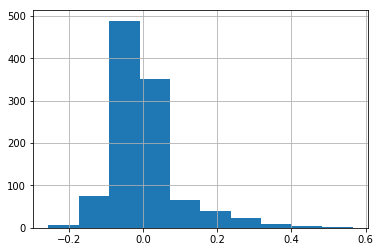

In [247]:
csv_df['signal'].hist();

#### Categorical data can be easily plotted using `.value_counts()` (it counts unique values). Below is a histogram over the subjects

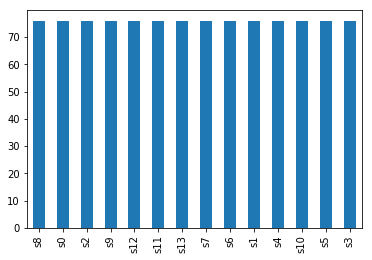

In [173]:
csv_df['subject'].value_counts().plot(kind='bar');

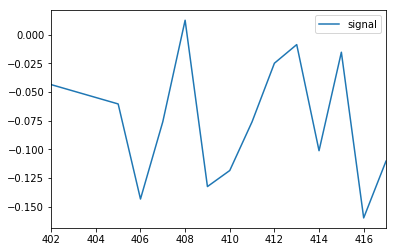

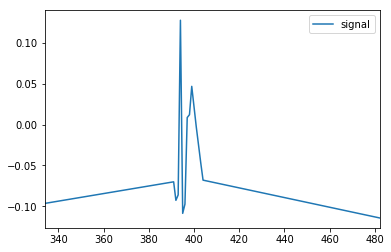

In [241]:
csv_df[['signal']][(csv_df['timepoint']==10) & (csv_df['event']==1) & (csv_df['region']=='frontal')].plot();
csv_df[['signal']][(csv_df['timepoint']==9) & (csv_df['event']==1) & (csv_df['region']=='frontal')].plot();

## Exercises

#### 1. Find all data that belongs to `['subject'] == s1`

#### 2. Turn `['region']` to a dummy variable

#### 3. Plot mean of signal of all subjects over 18 time points, during stimulation of parietal region 

#### 4. Find mean and std of signal over subjects for all timepoints during stimulation vs cue in frontal reigon

#### 5. Plot bars for means of signal over all time points during stimulation in parietal and frontal regions for subejct 5